# Analysis of experiments with protocol "turn_change"
CONTROL(30') - SHOCK(60') - DOTS_TURN(30')

3 patterns, e.g. 'xiv' or 'vxi', shocks are applied in the prefered arm (based on CONTROL session). In the DOTS_TURN session the pattern in the previously shocked arm is changed to a different neutral pattern ('dots'), and then all three patterns are rotated CW/CCW.

Initial question behind this paradigm was whether fish use pattern-aversion (proximal-cue) or distant-cues. If fish still avoids the arm where the shocks were (= stays in the arms with two previously safe patterns), even though the pattern is gone, it suggests:
* because patterns were rotated, it's not the smell in the water
* because shock-pattern is gone, it's not direct pattern aversion

Speculation then: *it's distant-cue navigation...* (if it works)

In [1]:
import numpy as np
import pandas as pd
from importlib import reload

from matplotlib import pyplot as plt
%matplotlib inline

import anchovy.md as md
import anchovy.analysis as analysis
import anchovy.plotting as plotting
import anchovy.classify as cl

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


Check the notebook ["turn_change_c"](tree/notebooks/protocol_analysis/turn_change_c.ipynb) for a control experiment where we show that change of pattern to 'dots' per se doesn't change the arm preference.

## Turn and change to dots


In [15]:
reload(md)
reload(analysis)
ss_sub = md.ssa_turn_change
ft = analysis.fish_types(ss_sub, x0=0.5)
over = ft['Overstayer']
ss_sub = ss_sub.loc[~ss_sub.xp_id.isin(over)]

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


Unstable: n = 0; Froze: n = 9


In [16]:
ft

{'Center': ['280218-03-01',
  '050318-03-01',
  '080318-01-01',
  '070318-02-01',
  '220318-01-01'],
 'Non-responder': ['010318-03-01', '200318-06-01'],
 'One arm': ['280218-02-01',
  '280218-04-01',
  '280218-06-01',
  '280218-07-01',
  '260218-07-01',
  '260218-08-01',
  '280218-09-01',
  '260218-09-01',
  '280218-11-01',
  '010318-05-01',
  '010318-06-01',
  '010318-07-01',
  '010318-08-01',
  '280218-16-01',
  '050318-02-01',
  '080318-07-01',
  '080318-08-01',
  '080318-10-01',
  '200318-03-01',
  '210318-03-01',
  '220318-03-01'],
 'Overstayer': ['280218-01-01',
  '280218-05-01',
  '280218-08-01',
  '010318-01-01',
  '010318-02-01',
  '260218-12-01',
  '010318-04-01',
  '280218-12-01',
  '270218-02-01',
  '010318-10-01',
  '050318-01-01',
  '050318-04-01',
  '080318-03-01',
  '080318-05-01',
  '080318-09-01',
  '120318-01-01',
  '120318-02-01',
  '200318-04-01',
  '210318-02-01',
  '210318-04-01',
  '220318-02-01'],
 'Two arms': ['280218-10-01',
  '260218-11-01',
  '010318-09-01'

In [ ]:
md.ssa_turn_change.loc[md.ssa_turn_change.xp_id =='010318-06-01', ['stim_at', 'env_patterns', 'ss_duration']]

In [ ]:
md.ssa_turn_change.loc[md.xp_new].loc[0::3].env_patterns.value_counts()

In [23]:
print("{} fish in the selection after {} overstayers were exluded".format(int(ss_sub.shape[0]/3), len(over)))

48 fish in the selection after 21 overstayers were exluded


In [ ]:
center = ft['Center']
ss_sub = ss_sub.loc[~ss_sub.xp_id.isin(center)]
print("{} fish in the selection after {} overcentrals were exluded".format(int(ss_sub.shape[0]/3), len(center)))

In [17]:
ss_sub = md.ssa.loc[md.ssa.xp_id.isin(ft['Center']+ft['One arm']+ft['Two arms']+ft['Non-responder'])]

In [18]:
central = []  # smallest chance of confusion? 
new_shock = []  # confusion because fish is safe and suddenly starts getting shocks
old_shock = []  # fish was getting shocks which suddenly stop
other = []
loc_patt = []
for g, gg in ss_sub.groupby('xp_id'):
    co = pd.read_hdf(gg.iloc[2].ss_coords_path)
    if co.loc[0, 'arm'] == 3:
        central.append(g)
    elif co.loc[0, 'arm'] == gg.iloc[2].stim_at:
        new_shock.append(g)
    elif co.loc[0, 'arm'] == gg.iloc[1].stim_at:
        old_shock.append(g)
    else:
        other.append(g)
    if g in ft['One arm']:
        co_1 = pd.read_hdf(gg.iloc[1].ss_coords_path)
        co_1 = co_1.iloc[int(co_1.shape[0]*5/6):]
        arm_list = co_1.arm.value_counts().index.tolist()
        all_arms = [0, 1, 2]
        if 3 in arm_list:
            arm_list.remove(3)
        if gg.iloc[1].stim_at in arm_list:
            arm_list.remove(gg.iloc[1].stim_at)
        all_arms.remove(gg.iloc[1].stim_at)
        pref_arm = arm_list[0]
        if gg.iloc[2].stim_at == pref_arm:
            loc_patt.append(g)
    #print co.loc[:5, 'arm'].values, gg.iloc[1].stim_at, gg.iloc[2].stim_at

print('central', len(central), central, '\n')
print('new shock', len(new_shock), new_shock, '\n')
print('old shock', len(old_shock), old_shock, '\n')
print('other', len(other), other)
print ('conflict loc vs pattern', len(loc_patt), loc_patt)

central 32 ['010318-03-01', '010318-06-01', '010318-07-01', '010318-08-01', '010318-09-01', '050318-02-01', '050318-03-01', '060318-01-01', '060318-02-01', '070318-02-01', '080318-01-01', '080318-07-01', '080318-10-01', '200318-03-01', '200318-05-01', '200318-06-01', '210318-01-01', '220318-01-01', '220318-03-01', '260218-07-01', '260218-08-01', '260218-09-01', '260218-11-01', '280218-02-01', '280218-03-01', '280218-04-01', '280218-06-01', '280218-07-01', '280218-10-01', '280218-11-01', '280218-14-01', '280218-15-01'] 

new shock 3 ['080318-08-01', '210318-03-01', '280218-09-01'] 

old shock 1 ['280218-13-01'] 

other 3 ['010318-05-01', '080318-06-01', '280218-16-01']
conflict loc vs pattern 8 ['010318-06-01', '080318-08-01', '080318-10-01', '210318-03-01', '220318-03-01', '280218-04-01', '280218-07-01', '280218-09-01']


Unstable: n = 0; Froze: n = 0
39.0
6.137222222222222


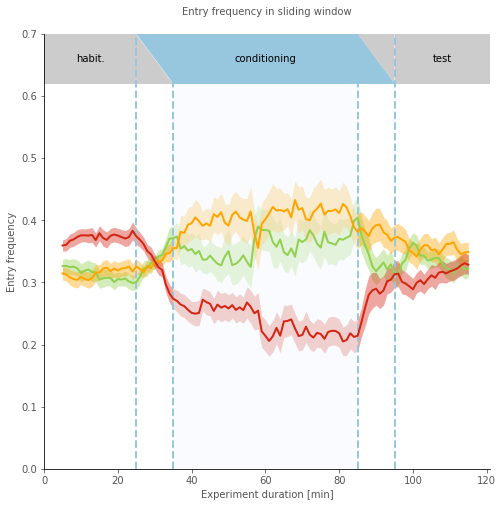

In [20]:
# plot sliding window for entry frequency, excluding overstayers
# NOTE: Number of entries decreases dramatically over time
# Look at entries to arms 0, 1, and 2. 
avg = plotting.plot_sliding(ss_sub, analysis.entry, excl=True, #individ=True,
                      name='Entry frequency in sliding window', #show_val=[0],
                      **{'val': [0,1,2]})

In [ ]:
avg = plotting.plot_sliding(ss_sub, analysis.entry, excl=True, individ=True,
                      name='Entry frequency in sliding window', show_val=[0],
                      **{'val': [0,1,2]})

Unstable: n = 0; Froze: n = 0
39.0
6.137222222222222


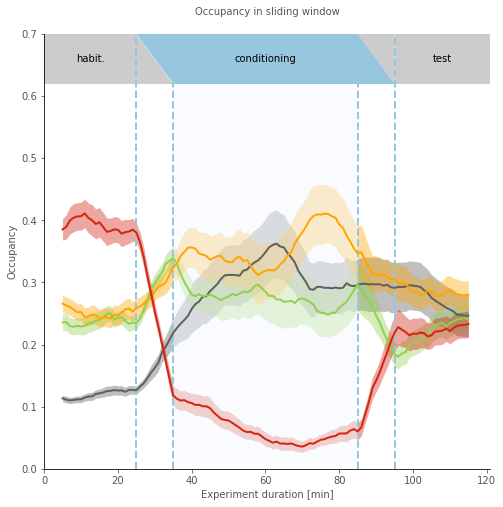

In [21]:
# plot sliding window for arm occupancy, excluding overstayers
# Look at occupancy of arms 0, 1, 2, and 3.
reload(plotting)
avg = plotting.plot_sliding(ss_sub, analysis.occupancy, excl=True, #individ=True,
                      name='Occupancy in sliding window', #show_val=[0],
                      **{'val': [0,1,2, 3]})

___

Unstable: n = 0; Froze: n = 0
32.0
6.137222222222222


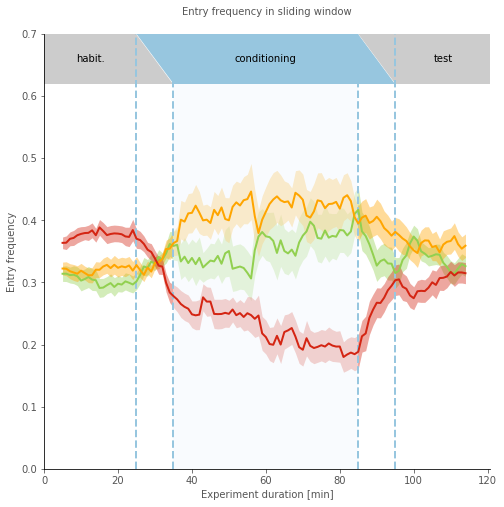

In [22]:
avg = plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(central)], analysis.entry, excl=True, #individ=True,
                      name='Entry frequency in sliding window', #show_val=[0],
                      **{'val': [0,1,2]})

Unstable: n = 0; Froze: n = 0
32.0
6.137222222222222


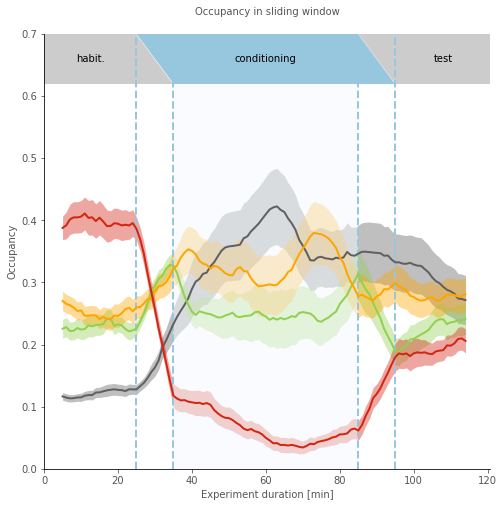

In [23]:
reload(plotting)
avg = plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(central)], analysis.occupancy, excl=True, #individ=True,
                      name='Occupancy in sliding window', #show_val=[0],
                      **{'val': [0,1,2, 3]})

In [ ]:
avg = plotting.plot_sliding(ss_sub, analysis.occupancy, excl=True, individ=True,
                      name='Occupancy in sliding window', show_val=[0],
                      **{'val': [0,1,2, 3]})

In [ ]:
reload(plotting)
plotting.plot_windows(ss_sub, func=analysis.occupancy)

In [ ]:
reload(plotting)
plotting.plot_windows(ss_sub, func=analysis.entry)

___

Unstable: n = 0; Froze: n = 0
21.0
6.137222222222222


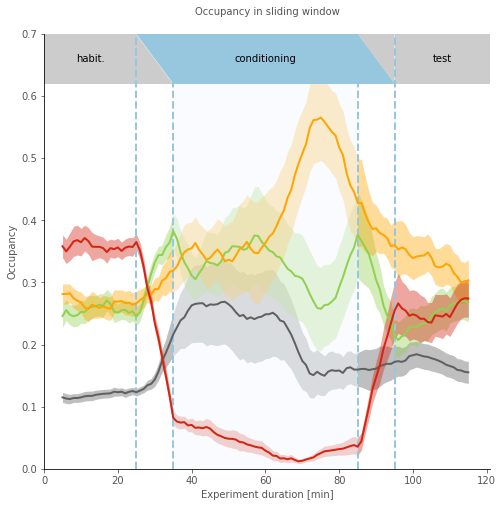

In [24]:
avg = plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['One arm'])],
                            analysis.occupancy, excl=True, #individ=True,
                      name='Occupancy in sliding window', #show_val=[0],
                      **{'val': [0,1,2, 3]})

Unstable: n = 0; Froze: n = 0
21.0
6.137222222222222


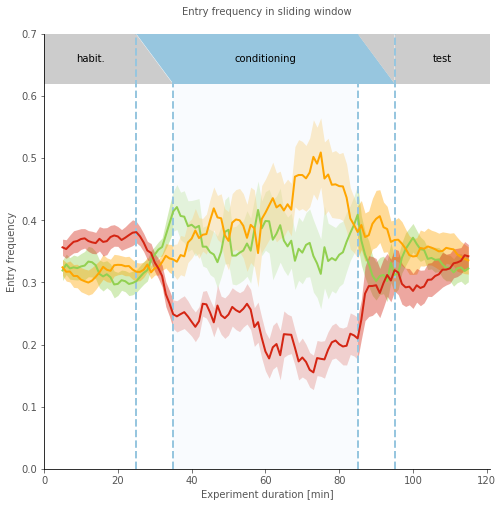

In [25]:
avg = plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['One arm'])],
                            analysis.entry, excl=True, #individ=True,
                      name='Entry frequency in sliding window', #show_val=[0],
                      **{'val': [0,1,2]})

15.0
6.13722222222


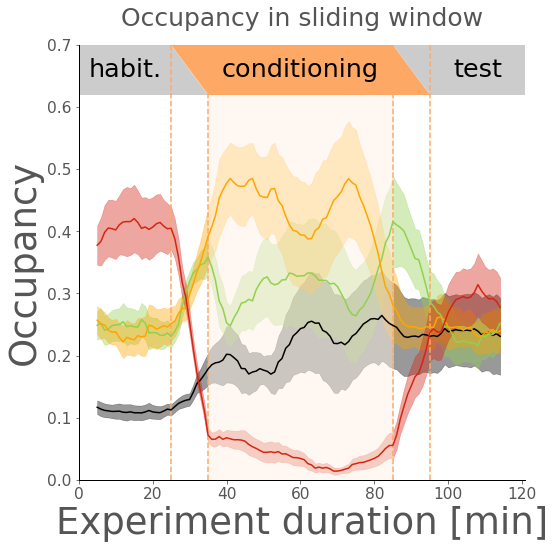

In [32]:
avg = plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['One arm']) & ss_sub.xp_id.isin(central)], 
                            analysis.occupancy, excl=True, #individ=True,
                      turn_orig=True, name='Occupancy in sliding window', #show_val=[0],
                      **{'val': [0,1,2, 3]})

15.0
6.13722222222


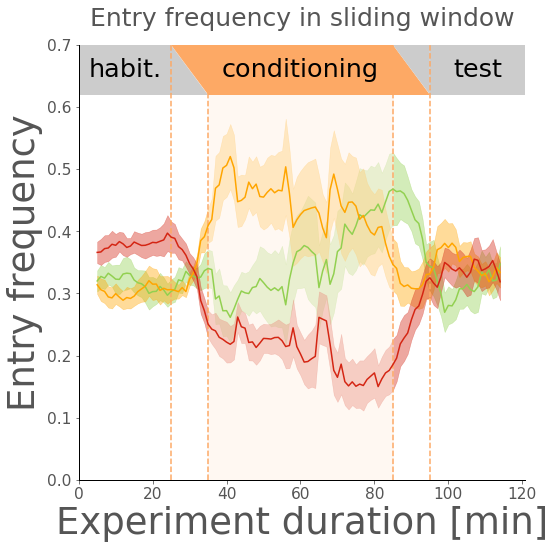

In [33]:
avg = plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['One arm']) & ss_sub.xp_id.isin(central)],
                            analysis.entry, excl=True, #individ=True,
                      name='Entry frequency in sliding window', #show_val=[0],
                            turn_orig=True,
                      **{'val': [0,1,2]})

___

Unstable: n = 0; Froze: n = 0
11.0
6.137222222222222


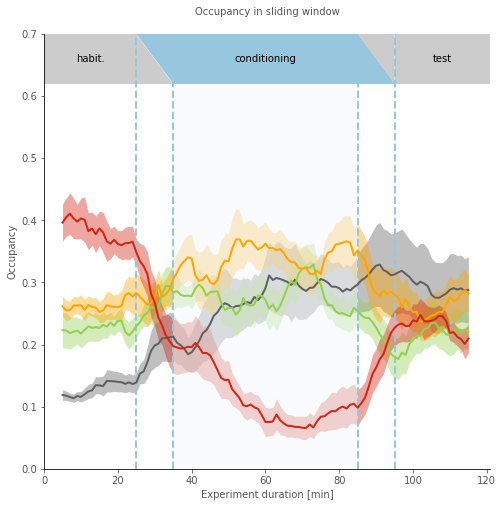

In [26]:
avg = plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['Two arms'])],
                            analysis.occupancy, excl=True, #individ=True,
                      name='Occupancy in sliding window', #show_val=[0],
                      **{'val': [0,1,2, 3]})

Unstable: n = 0; Froze: n = 0
11.0
6.137222222222222


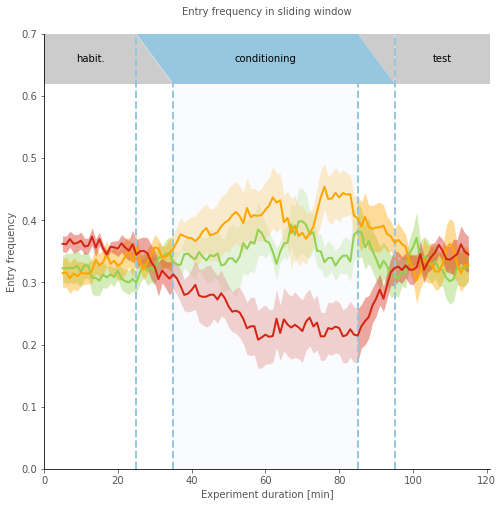

In [27]:
avg = plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['Two arms'])],
                            analysis.entry, excl=True, #individ=True,
                      name='Entry frequency in sliding window', #show_val=[0],
                      **{'val': [0,1,2]})

8.0
6.13722222222


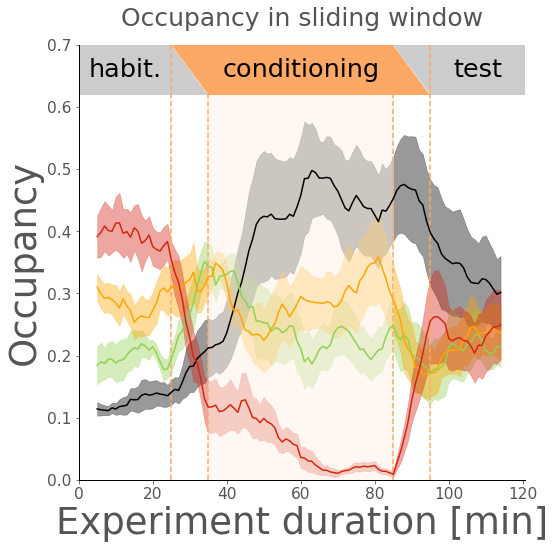

In [37]:
avg = plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['Two arms']) & ss_sub.xp_id.isin(central)],
                            analysis.occupancy, excl=True, #individ=True,
                      name='Occupancy in sliding window', #show_val=[0],
                            turn_orig=True,
                      **{'val': [0,1,2, 3]})

8.0
6.13722222222


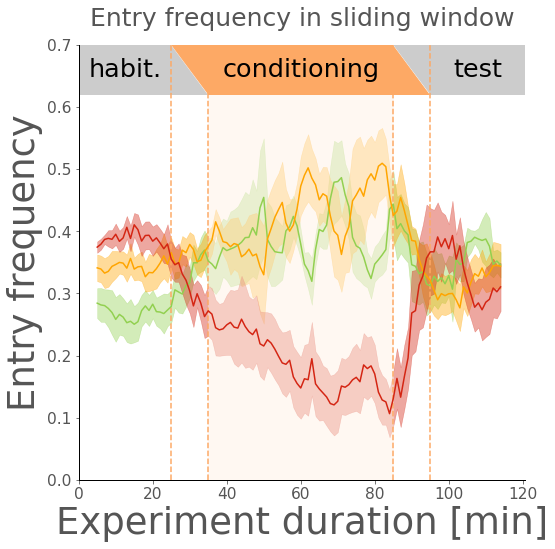

In [38]:
avg = plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['Two arms']) & ss_sub.xp_id.isin(central)],
                            analysis.entry, excl=True, #individ=True,
                      name='Entry frequency in sliding window', #show_val=[0],
                            turn_orig=True,
                      **{'val': [0,1,2]})

___

Unstable: n = 0; Froze: n = 0
8.0
6.137222222222222


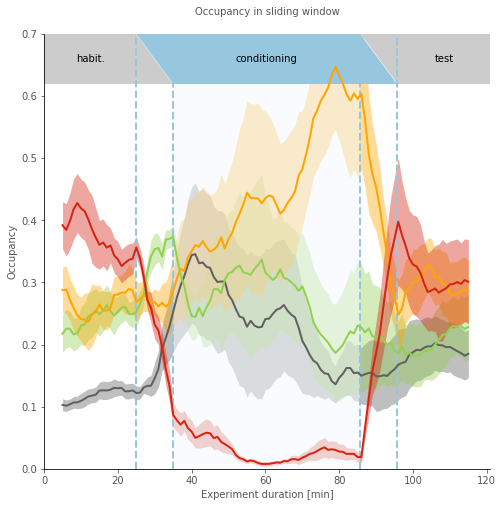

In [ ]:
avg = plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(loc_patt)],
                            analysis.occupancy, excl=True, #individ=True,
                      name='Occupancy in sliding window', #show_val=[0],
                      **{'val': [0,1,2, 3]})

In [ ]:
avg = plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(loc_patt)],
                            analysis.entry, excl=True, #individ=True,
                      name='Entry frequency in sliding window', #show_val=[0],
                      **{'val': [0,1,2]})

Unstable: n = 0; Froze: n = 0
8.0


___

In [ ]:
avg = plotting.plot_sliding(~ss_sub.loc[ss_sub.xp_id.isin(loc_patt) & ss_sub.xp_id.isin(ft['One arm'])],
                            analysis.occupancy, excl=True, #individ=True,
                      name='Occupancy in sliding window', #show_val=[0],
                      **{'val': [0,1,2, 3]})

In [ ]:
avg = plotting.plot_sliding(~ss_sub.loc[ss_sub.xp_id.isin(loc_patt) & ss_sub.xp_id.isin(ft['One arm'])],
                            analysis.entry, excl=True, #individ=True,
                      name='Entry frequency in sliding window', #show_val=[0],
                      **{'val': [0,1,2]})

___

8.0
6.13722222222


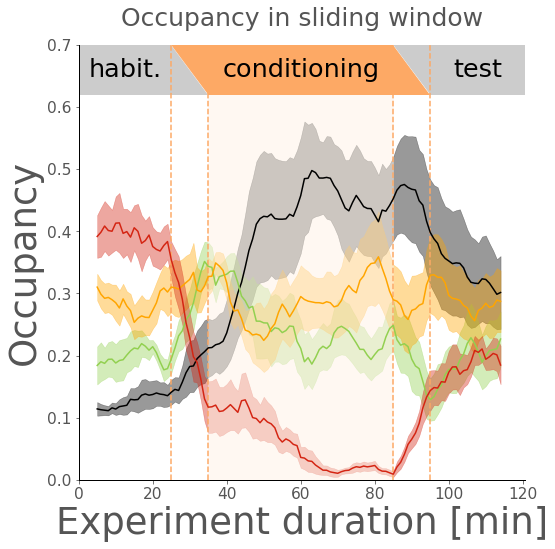

In [19]:
avg = plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(central) & ss_sub.xp_id.isin(ft['Two arms'])],
                            analysis.occupancy, excl=True, #individ=True,
                      name='Occupancy in sliding window', #show_val=[0],
                      **{'val': [0,1,2, 3]})

8.0
6.13722222222


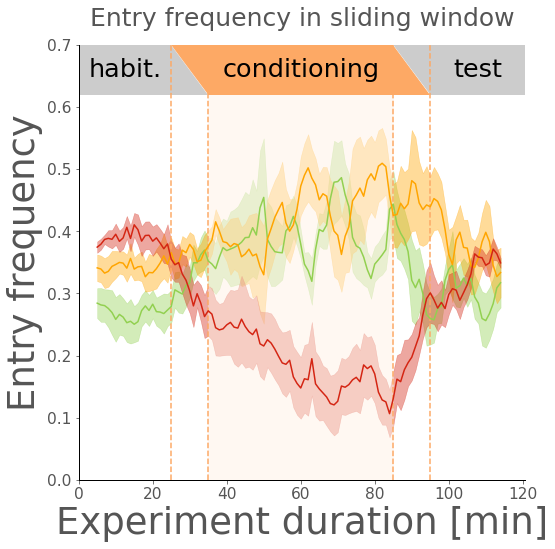

In [20]:
avg = plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(central) & ss_sub.xp_id.isin(ft['Two arms'])],
                            analysis.entry, excl=True, #individ=True,
                      name='Entry frequency in sliding window', #show_val=[0],
                      **{'val': [0,1,2]})

### Classify results
First we construct a matrix out of sliding windows for arm occupancy, including shocked arm and center. Thus we possibly can filter out 'unresponsive' fish and fish whose 'good' response is due to high center occupancy (which could be interesting in itself, but not for the purposes of this experiment).

In [ ]:
reload(cl)
m = cl.ssa2matrix(ss_sub, [analysis.occupancy], center=True, 
                  **{'full':True,'win_size':1200,'sliding_overlap':1140})
ssa_m = pd.DataFrame(m)
ssa_m[ssa_m.columns[1:]].T.plot()
plt.setp(plt.gca(), ylabel='Occupancy of shocked arm and \ncentral compartment (merged)')
plt.legend('')
plt.show()

In [ ]:
y_pred = cl.cluster(ssa_m, cl.hi_alg, **{'n':2})

In [ ]:
# select only one cluster for further analysis
# a smaller cluster seems to include fish with very high center occupancy - let's get rid of it!
no_center = cl.good_bad(ss_sub, ssa_m, y_pred, 0)
no_center

In [ ]:
# construct a matrix of sliding windows for occupancy and entry frequency of shock arm
m = cl.ssa2matrix(no_center, [analysis.entry, analysis.occupancy], 
                  **{'full':True,'win_size':1200,'sliding_overlap':1140})
ssa_m = pd.DataFrame(m)
ssa_m[ssa_m.columns[1:]].T.plot()
plt.setp(plt.gca(), ylabel='Occupancy/entry of shocked arm')
plt.legend('')
plt.show()

In [ ]:
y_pred = cl.cluster(ssa_m, cl.ac_alg, **{'n':2})